In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

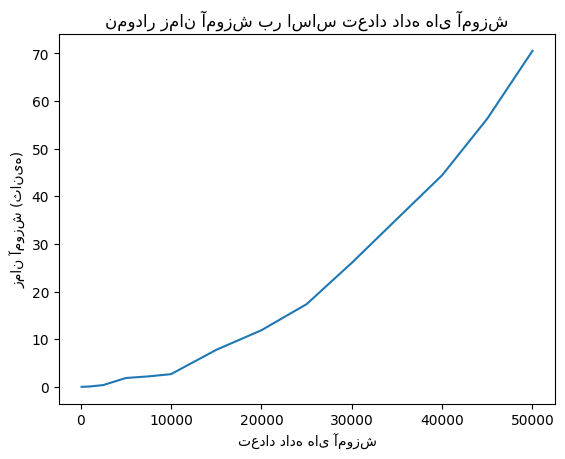

In [ ]:
covtype = fetch_covtype()
X = covtype.data[:, [0, 1, 2, 3]]
y = covtype.target

training_sizes = [100, 500, 1000, 2500, 5000, 7500, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
training_times = []

for size in training_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)

    start_time = time.time()
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    end_time = time.time()

    training_times.append(end_time - start_time)

plt.plot(training_sizes, training_times)
plt.xlabel("تعداد داده های آموزش")
plt.ylabel("زمان آموزش (ثانیه)")
plt.title("نمودار زمان آموزش بر اساس تعداد داده های آموزش")
plt.show()

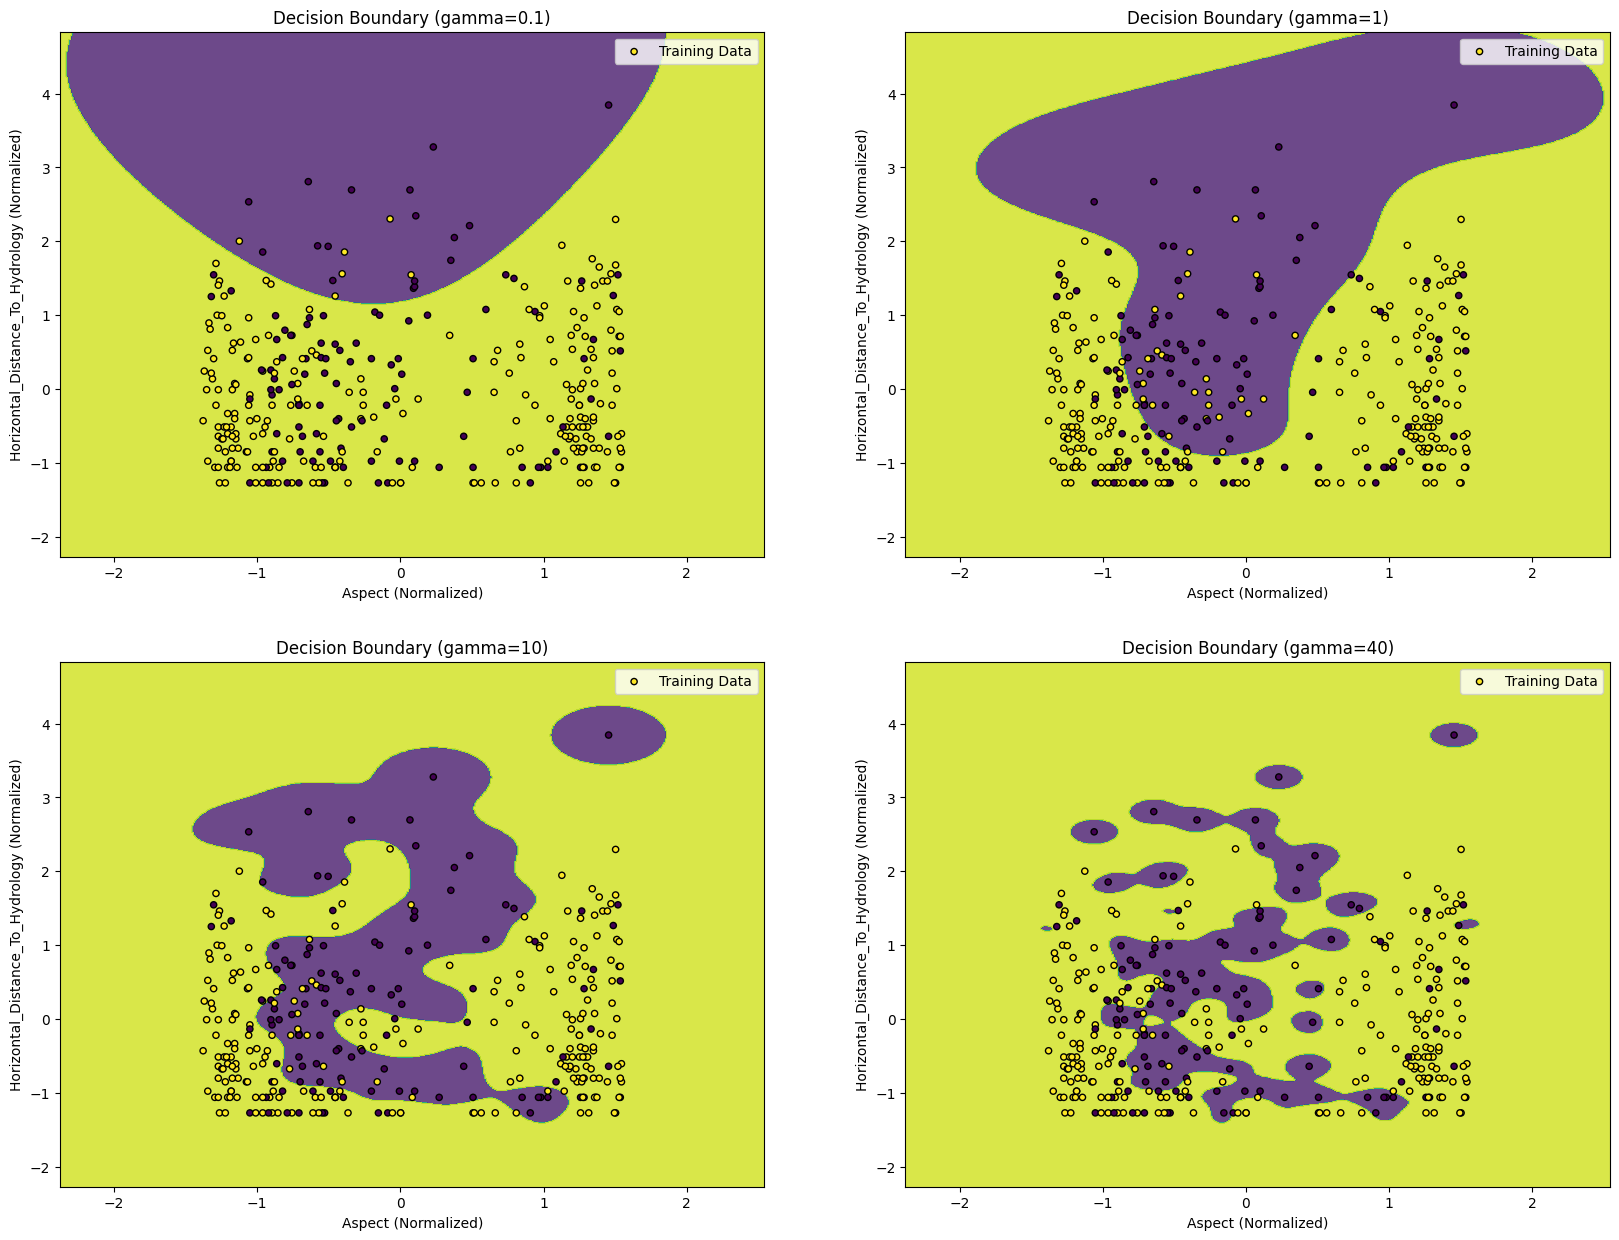

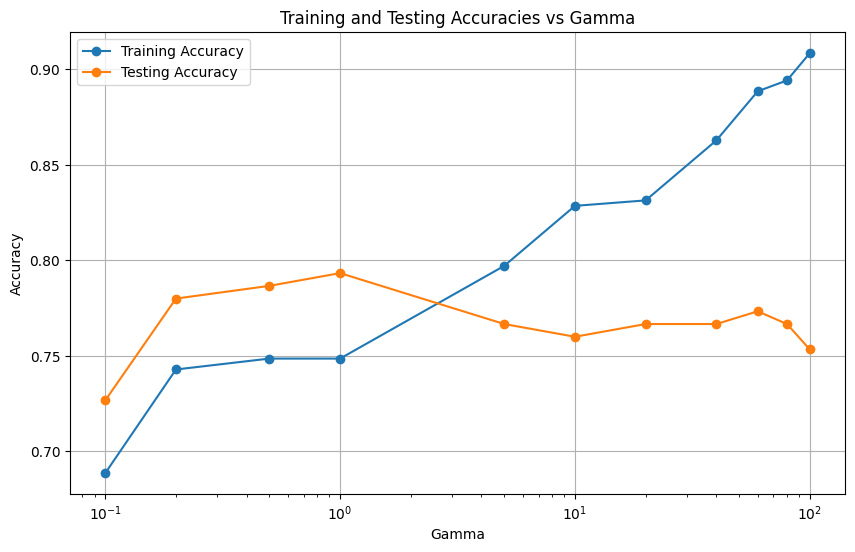

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_covtype()
X = data.data
y = data.target

selected_features = ['Aspect', 'Horizontal_Distance_To_Hydrology']
selected_columns = [data.feature_names.index(f) for f in selected_features]
X = X[:, selected_columns]

mask = (y == 5) | (y == 6)
X = X[mask]
y = y[mask]

y = (y == 6).astype(int)

np.random.seed(42)
indices = np.random.choice(len(X), 500, replace=False)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

gamma_values = [0.1, 0.2, 0.5, 1, 5, 10, 20, 40, 60, 80, 100]

train_accuracies = []
test_accuracies = []

for gamma in gamma_values:
    clf = svm.SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

plot_gammas = [0.1, 1, 10, 40]
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

plt.figure(figsize=(20, 15))
for i, gamma in enumerate(plot_gammas, 1):
    clf = svm.SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=20, label='Training Data')
    plt.title(f'Decision Boundary (gamma={gamma})')
    plt.xlabel('Aspect (Normalized)')
    plt.ylabel('Horizontal_Distance_To_Hydrology (Normalized)')
    plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(gamma_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs Gamma')
plt.legend()
plt.grid(True)
plt.show()


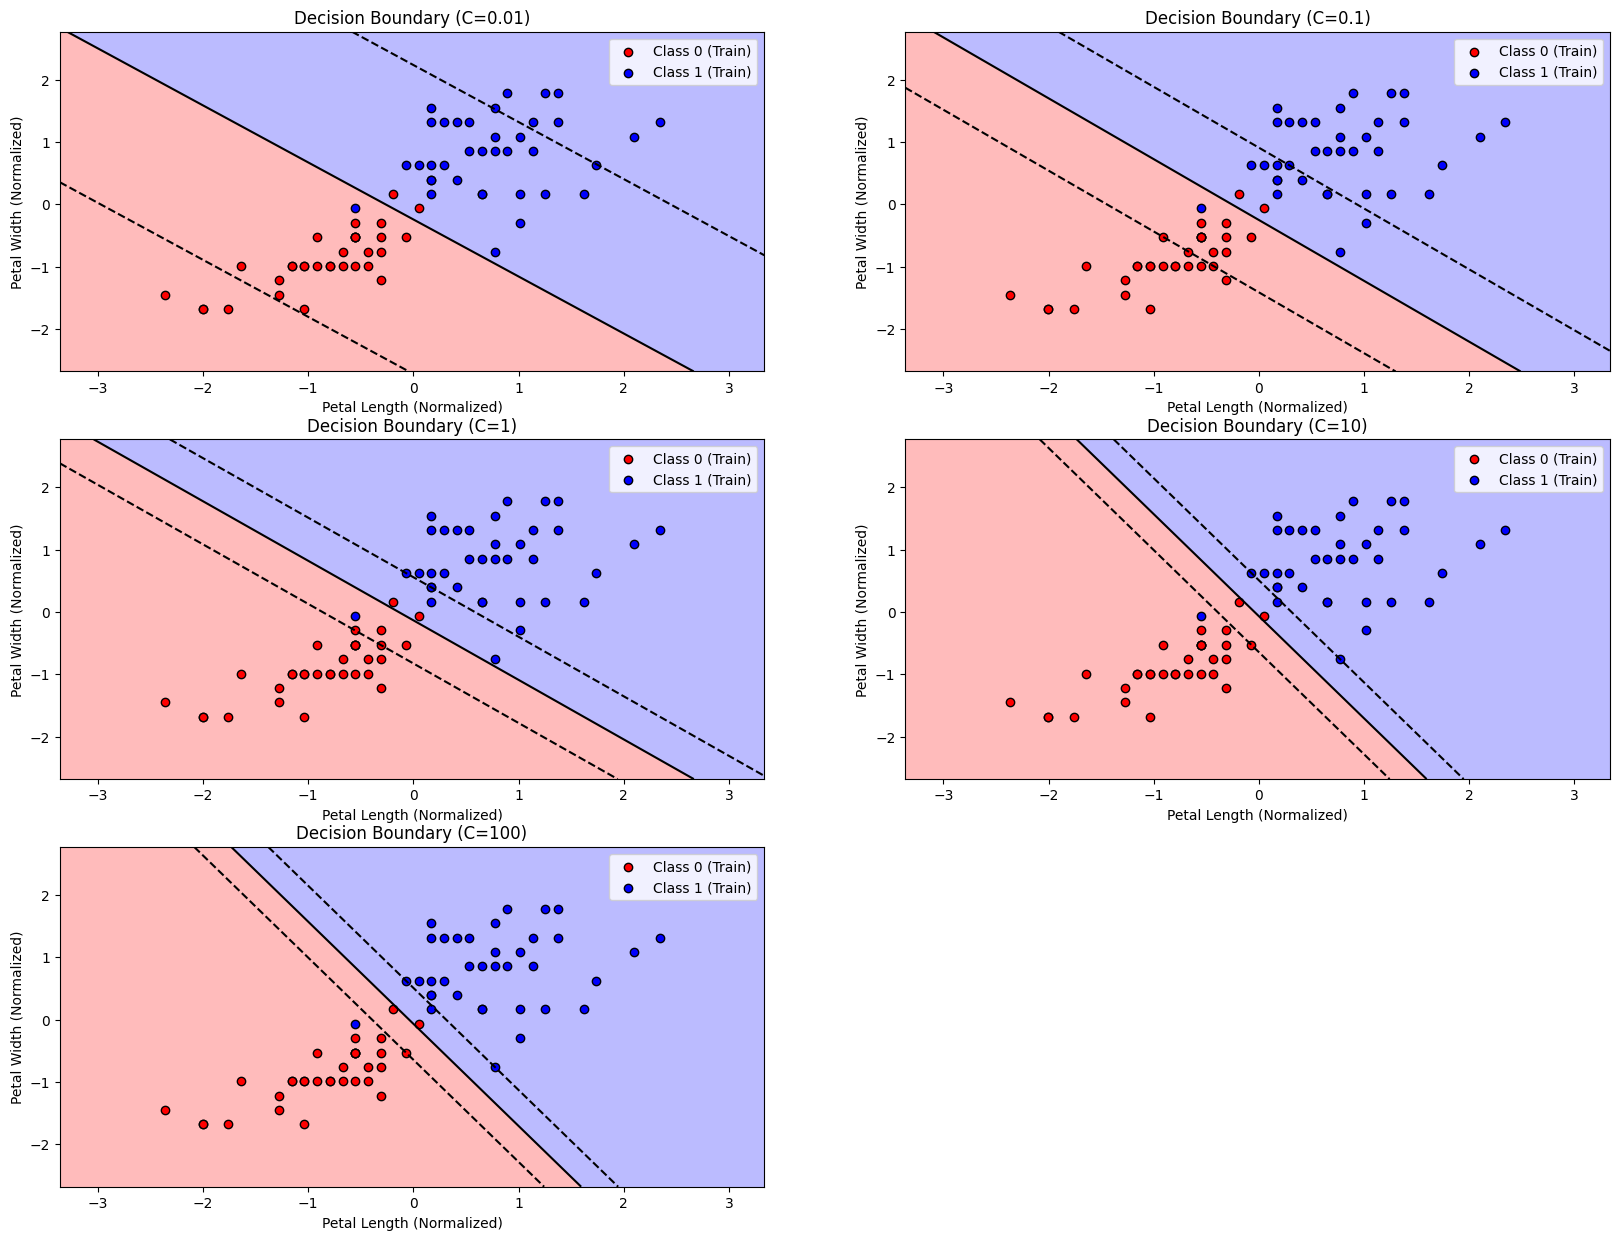

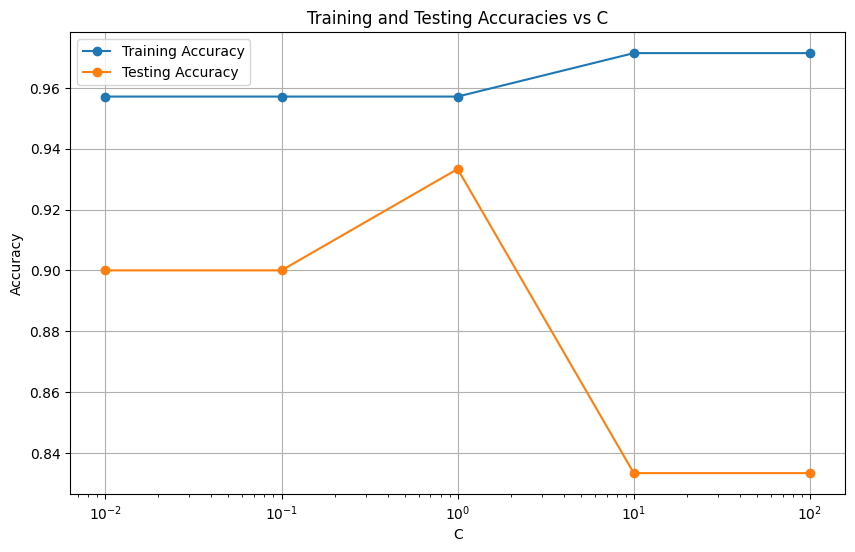

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

selected_features = [2, 3]
X = X[:, selected_features]
mask = (y == 1) | (y == 2)
y = y[mask]
X = X[mask]

y = (y == 2).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C_values = [0.01, 0.1, 1, 10, 100]

train_accuracies = []
test_accuracies = []

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

plt.figure(figsize=(20, 15))

for i, C in enumerate(C_values, 1):
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 2, i)
    plt.contourf(xx, yy, Z > 0, alpha=0.8, levels=1, colors=["#FFAAAA", "#AAAAFF"])
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="red", label="Class 0 (Train)", edgecolors="k")
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="blue", label="Class 1 (Train)", edgecolors="k")
    plt.title(f'Decision Boundary (C={C})')
    plt.xlabel('Petal Length (Normalized)')
    plt.ylabel('Petal Width (Normalized)')
    plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs C')
plt.legend()
plt.grid(True)
plt.show()


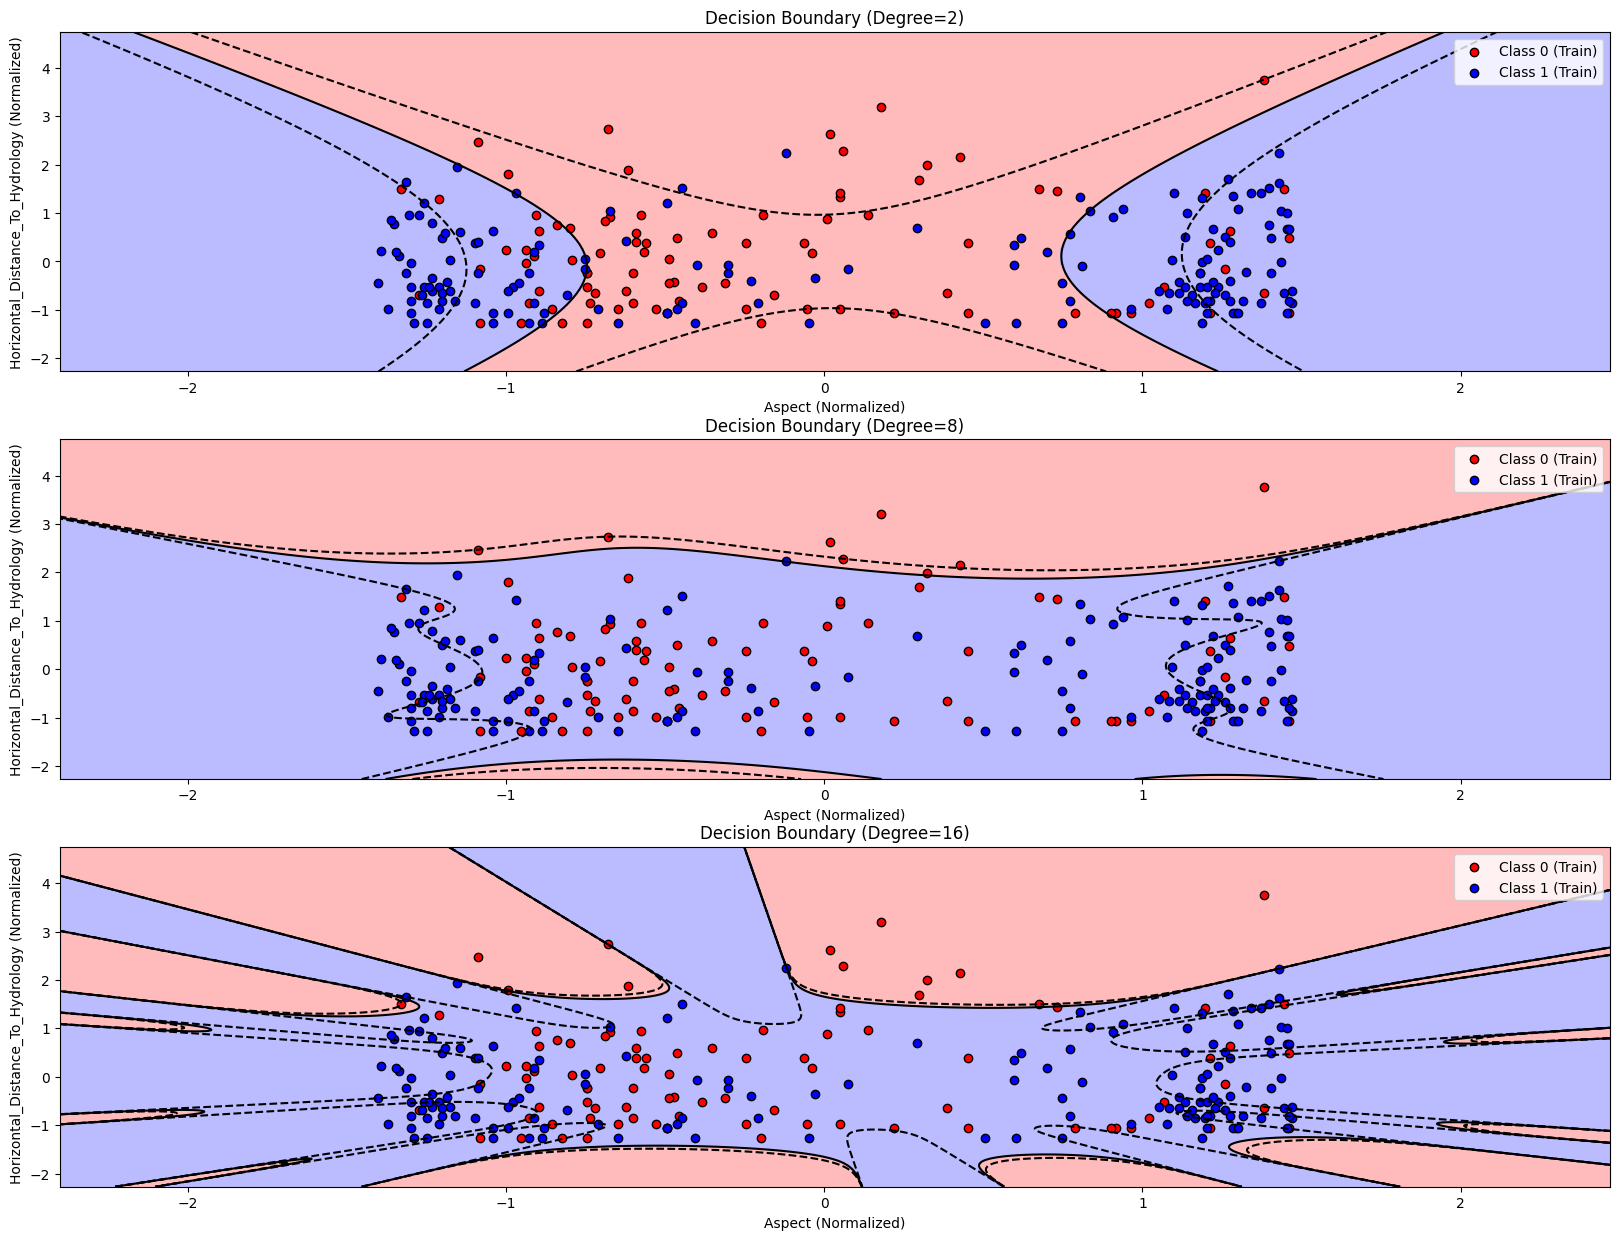

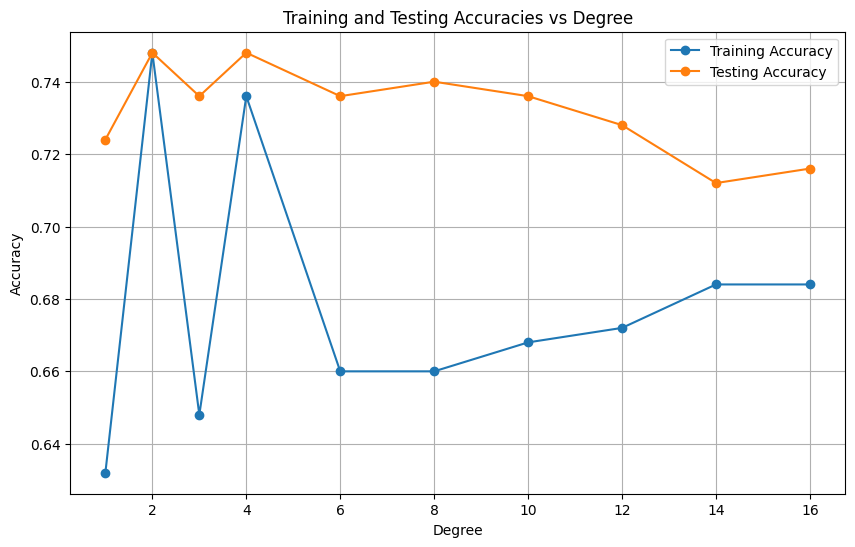

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_covtype()
X = data.data
y = data.target

selected_features = ['Aspect', 'Horizontal_Distance_To_Hydrology']
selected_columns = [data.feature_names.index(f) for f in selected_features]
X = X[:, selected_columns]

mask = (y == 5) | (y == 6)
X = X[mask]
y = y[mask]

y = (y == 6).astype(int)

np.random.seed(42)
indices = np.random.choice(len(X), 500, replace=False)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

degrees = [1, 2, 3, 4, 6, 8, 10, 12, 14, 16]

train_accuracies = []
test_accuracies = []

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

plt.figure(figsize=(20, 15))

for i, degree in enumerate(degrees, 1):
    clf = svm.SVC(kernel='poly', degree=degree)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    if degree in [2, 8, 16]:
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(3, 1, [2, 8, 16].index(degree) + 1)
        plt.contourf(xx, yy, Z > 0, alpha=0.8, levels=1, colors=["#FFAAAA", "#AAAAFF"])
        plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")
        plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="red", label="Class 0 (Train)", edgecolors="k")
        plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="blue", label="Class 1 (Train)", edgecolors="k")
        plt.title(f'Decision Boundary (Degree={degree})')
        plt.xlabel('Aspect (Normalized)')
        plt.ylabel('Horizontal_Distance_To_Hydrology (Normalized)')
        plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(degrees, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs Degree')
plt.legend()
plt.grid(True)
plt.show()


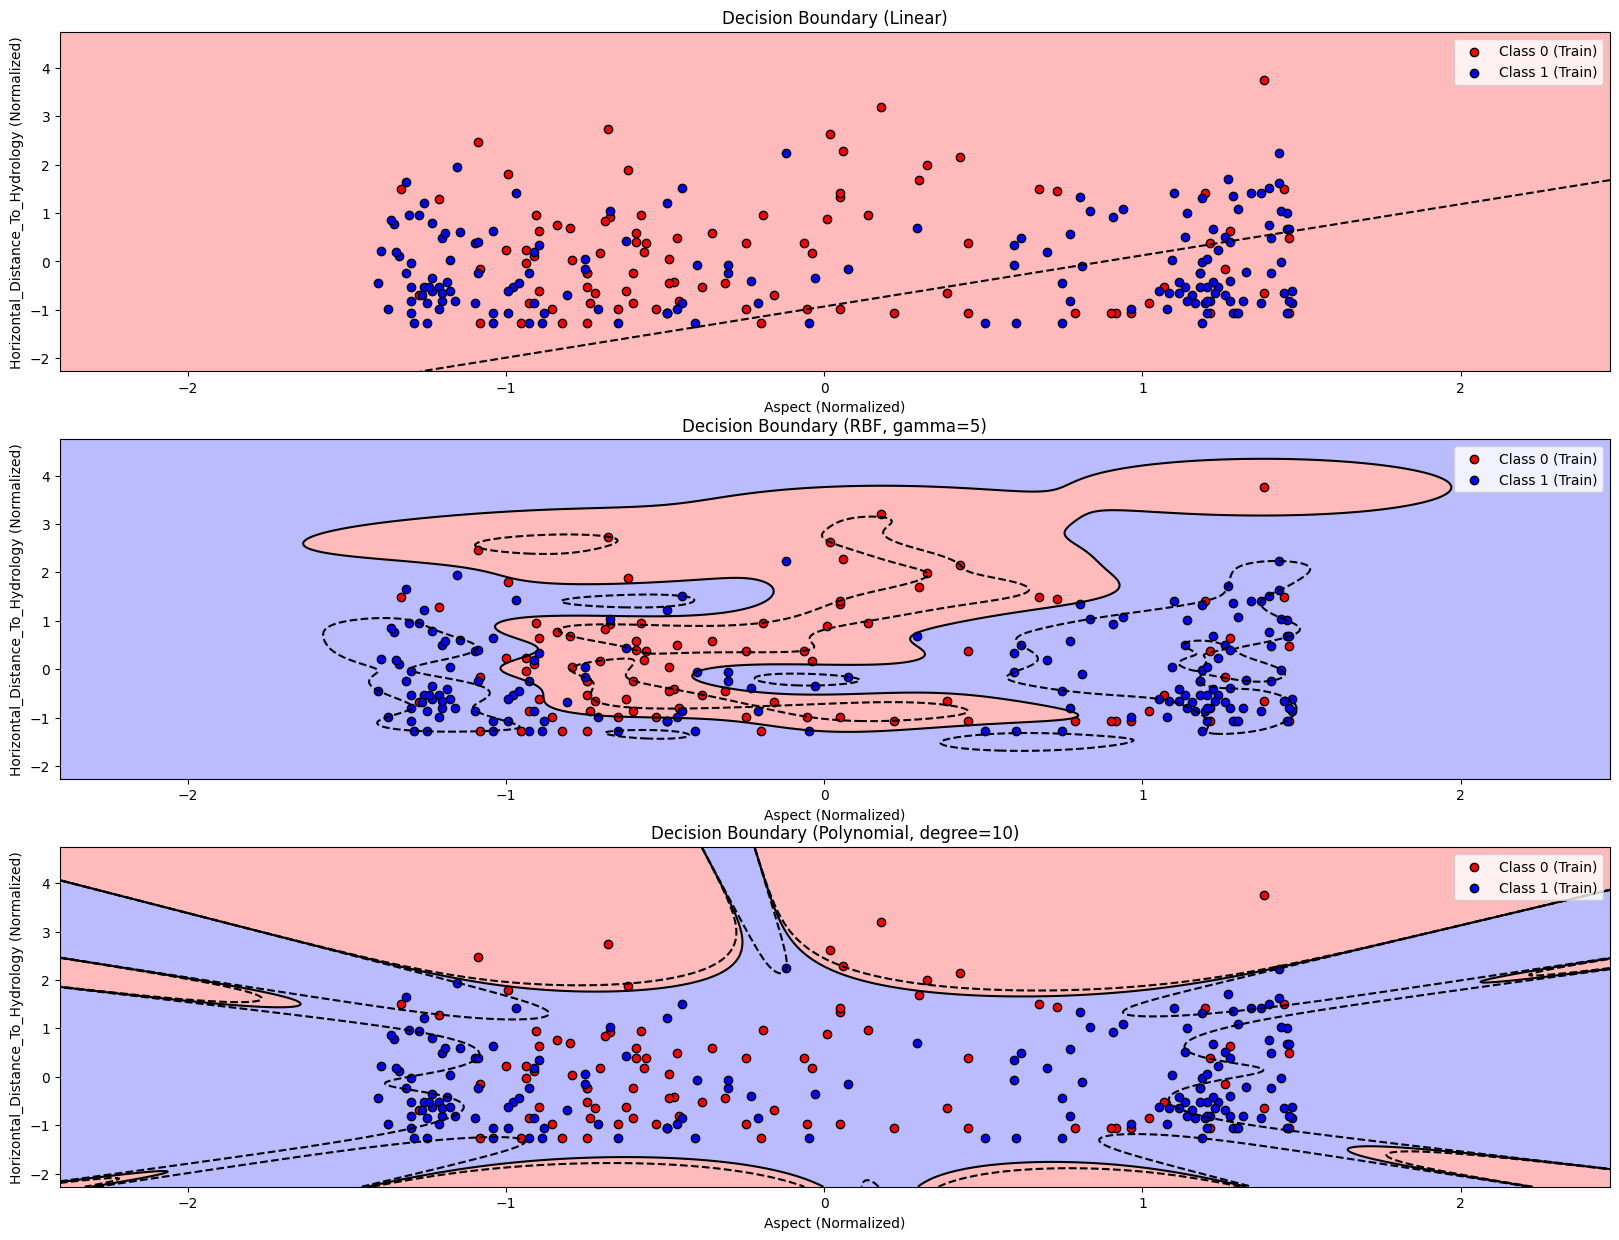

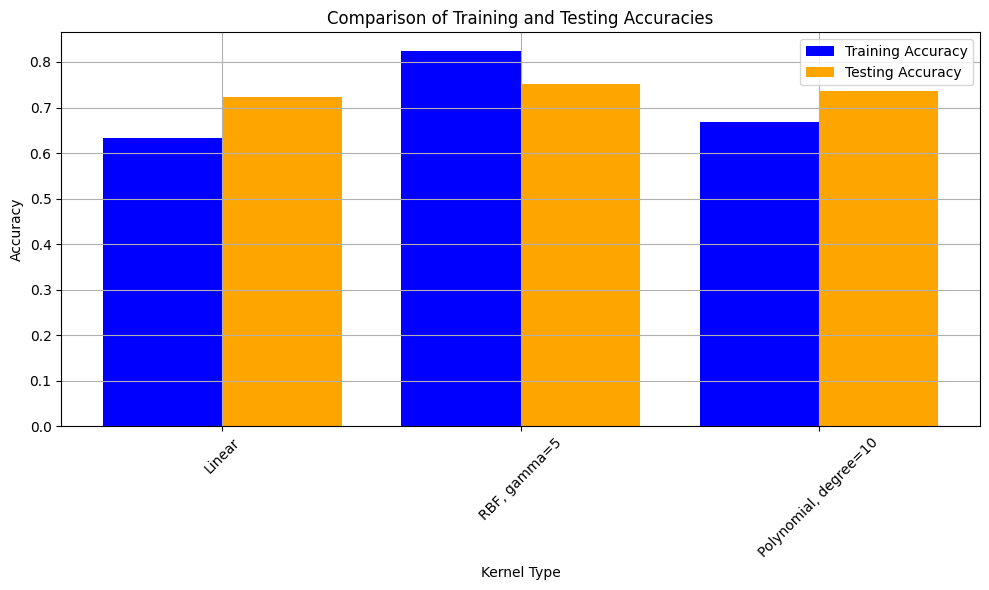

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = fetch_covtype()
X = data.data
y = data.target

selected_features = ['Aspect', 'Horizontal_Distance_To_Hydrology']
selected_columns = [data.feature_names.index(f) for f in selected_features]
X = X[:, selected_columns]

mask = (y == 5) | (y == 6)
X = X[mask]
y = y[mask]

y = (y == 6).astype(int)

np.random.seed(42)
indices = np.random.choice(len(X), 500, replace=False)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernels = [
    ("Linear", svm.SVC(kernel='linear')),
    ("RBF, gamma=5", svm.SVC(kernel='rbf', gamma=5)),
    ("Polynomial, degree=10", svm.SVC(kernel='poly', degree=10))
]

train_accuracies = []
test_accuracies = []

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

plt.figure(figsize=(20, 15))

for i, (name, clf) in enumerate(kernels, 1):
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 1, i)
    plt.contourf(xx, yy, Z > 0, alpha=0.8, levels=1, colors=["#FFAAAA", "#AAAAFF"])
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color="red", label="Class 0 (Train)", edgecolors="k")
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="blue", label="Class 1 (Train)", edgecolors="k")
    plt.title(f'Decision Boundary ({name})')
    plt.xlabel('Aspect (Normalized)')
    plt.ylabel('Horizontal_Distance_To_Hydrology (Normalized)')
    plt.legend()

plt.figure(figsize=(10, 6))
x_labels = [name for name, _ in kernels]
x_pos = np.arange(len(kernels))

plt.bar(x_pos - 0.2, train_accuracies, width=0.4, label='Training Accuracy', color='blue')
plt.bar(x_pos + 0.2, test_accuracies, width=0.4, label='Testing Accuracy', color='orange')
plt.xticks(x_pos, x_labels, rotation=45)
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Comparison of Training and Testing Accuracies')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
